In [15]:
import os

import torch
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader

from neulight.dataset.free_viewpoint import FreeViewpointDataset
from neulight.model.neus import NeuSLightningModel
from neulight.utils.files import read_file
from neulight.visualization.visualize_rays import visualize_rays

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

## Read Config

In [16]:
config = read_file("../config/neus.yaml")

## Sample a batch of rays from the training dataset

In [17]:
dtype = torch.float32
device = torch.cuda.current_device()
batch_size = 4
num_workers = 2
free_viewpoint_scene_path = "../data/neulight/Salon2"
num_rays_per_image = 1024

In [18]:
free_viewpoint_train_dataset = FreeViewpointDataset(
    scene_path=free_viewpoint_scene_path,
    dataset_type="train",
    num_rays_per_image=num_rays_per_image,
)
free_viewpoint_train_dataloader = DataLoader(
    free_viewpoint_train_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=free_viewpoint_train_dataset.collate_fn,
    num_workers=num_workers,
    persistent_workers=True,
)

In [19]:
batch = free_viewpoint_train_dataset.move_batch_to(
    next(iter(free_viewpoint_train_dataloader)),
    device=device,
    dtype=dtype,
)

In [20]:
image = visualize_rays(
    batch["inputs"]["rays"],
    batch["labels"]["colors"],
    interactive=False,
)

FEngine (64 bits) created at 0x55a7c3707ed0 (threading is enabled)
EGL(1.5)
OpenGL(4.1)


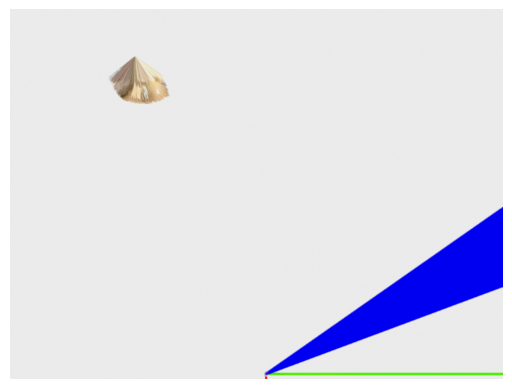

In [21]:
plt.imshow(image)
plt.axis("off")
plt.show()

## Initialize the model

In [22]:
neus_model = NeuSLightningModel(config["model"]).to(device)

## Extract Geometry

In [23]:
vertices, faces = neus_model.extract_geometry(resolution=256)

In [24]:
np.savez("../checkpoints/mesh.npz", vertices=vertices, faces=faces)